### 분류 예측의 불확실성 추정

### GradientBoosting 모델 생성

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np


X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 클래스 이름 바꾸기
y_named = np.array(["Blue", "Red"])[y]

# 여러개의 배열을 한번에 train, test set으로 나누기
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# 그레디언트 부스팅 모델
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [3]:
np.array(["Blue", "Red"])[y]

array(['Red', 'Red', 'Blue', 'Red', 'Red', 'Blue', 'Blue', 'Red', 'Red',
       'Red', 'Red', 'Blue', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue',
       'Red', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Red',
       'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue',
       'Blue', 'Red', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Blue', 'Red',
       'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Blue',
       'Blue', 'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red',
       'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red',
       'Blue', 'Red', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Blue',
       'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Blue', 'Blue',
       'Red', 'Red', 'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Red', 'Blue',
       'Red', 'Blue', 'Blue'], dtype='<U4')

In [10]:
# defualt 3:1의 비율로 train, test set을 나눔.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
print("X", X.shape)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_named", y_named.shape)
print("y_train_named", y_train_named.shape)
print("y_test_named", y_test_named.shape)
print("y", y.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X (100, 2)
X_train (75, 2)
X_test (25, 2)
y_named (100,)
y_train_named (75,)
y_test_named (25,)
y (100,)
y_train (75,)
y_test (25,)


### 결정함수 - decision_function

In [14]:
# 이진분류에서 decision_function 반환값의 크기는 (n_samples, )이며 각 샘플이 하나의 실수값을 반환
print("X_test.shape", X_test.shape)
print("결정함수 결과 형태:", gbrt.decision_function(X_test).shape)
print("결정함수: ", gbrt.decision_function(X_test)) # 이 값은 양성 클래스인 1에 속한다고 믿는 정도 (기준 0 : 0 이상이면 양성, 0 이하이면 음성으로 판별)

X_test.shape (25, 2)
결정함수 결과 형태: (25,)
결정함수:  [ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46260856  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]


In [16]:
# 결정함수 결과 비교
print("임계치와 결정 함수 결과 비교: \n", gbrt.decision_function(X_test) > 0) # 양성이라면 True가 반환 됨. 조건을 주었으니까
print("예측:\n", gbrt.predict(X_test)) # Red 양성, Blue 음성

임계치와 결정 함수 결과 비교: 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['Red' 'Blue' 'Blue' 'Blue' 'Red' 'Red' 'Blue' 'Red' 'Red' 'Red' 'Blue'
 'Red' 'Red' 'Blue' 'Red' 'Blue' 'Blue' 'Blue' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Blue' 'Blue']


In [18]:
# 불리언 값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int) # astype(int)로 바꾸면 true는 1, false는 0 을 반환
print("greater_zero: ", greater_zero)

# classes_에 인덱스로 사용
pred = gbrt.classes_[greater_zero]

# pred와 gbrt.predict의 결과를 비교
# np.all(조건) 조건이 모두 맞으면 True 아니면 False를 반환
print("pred는 예측 결과와 같다: ", np.all(pred == gbrt.predict(X_test)))

greater_zero:  [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]
pred는 예측 결과와 같다:  True


In [19]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))
# 양성이라고 확신하는 정도가 -7.69: 음성, 확신하는 정도가 4.29: 양성

결정 함수 최솟값: -7.69 최댓값: 4.29


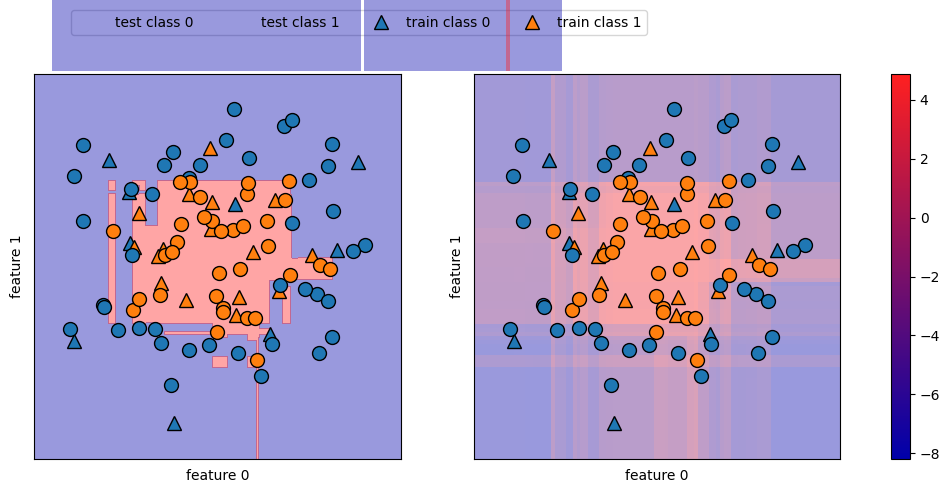

In [35]:
# 2차원 평면에 모든 점에 대해 decision function의 값 나타내기
import mglearn
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(1,2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = fig.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

### 예측 확률 - predict_proba

In [38]:
# 이진 분류에서 predict_proba의 크기는 (n_samples, 2)이다.
print("확률 값의 형태: ", gbrt.predict_proba(X_test).shape)
print("예측 확률 : \n", gbrt.predict_proba(X_test[:6]))
# 분류 기준 : 0.5, 0번째 열 음성일 확률, 1번째 열 양성일 확률

확률 값의 형태:  (25, 2)
예측 확률 : 
 [[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


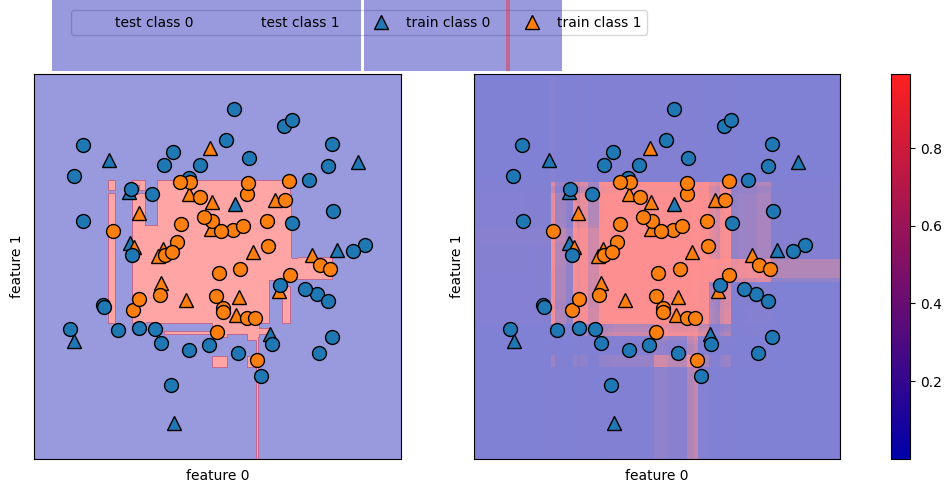

In [39]:
fig, axes = plt.subplots(1,2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers="o", ax=ax)
    
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()
# 왼: 결정 경계, 오: 예측 확률